In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from plotnine import *


In [2]:
#I have written several functions to do the analysis.

In [3]:
final_table = pd.read_csv('3.0_ultimate_final_frame.csv')

In [4]:
def Frame_Preparation(state, control_states, response, policy_change_year):
    #This function does the initial preparation of the frames and variables for analysis of the states
    #separate out into State and control frames
    control_state_frame = final_table.loc[(final_table['State'] == control_states[0]) | (final_table['State'] == control_states[1]) | (final_table['State'] == control_states[2])]
    response_state_frame = final_table.loc[final_table['State'] == state]
    
    #Pool by average of the counties
    control_pooled = control_state_frame
    response_state_pooled = response_state_frame

    
    #figure out policy change year
    pc_year = policy_change_year
    pc_year_minus_1 = pc_year -1
    
    #Calculate years from policy change
    control_pooled['Years_From_Policy_Change'] = control_pooled['Year'] - pc_year
    response_state_pooled['Years_From_Policy_Change'] = response_state_pooled['Year'] - pc_year
    
    return control_pooled, response_state_pooled, pc_year, pc_year_minus_1

In [5]:
def diff_in_diff(state, control_states, response, policy_change_year):
    #this function should give the diff_in_diff graph based on the state wanted
    #the control states as a list
    #the response column requested
    #and the policy change year
    
    control_pooled, response_state_pooled, pc_year, pc_year_minus_1 = Frame_Preparation(state, control_states, response, policy_change_year)
    
    p = (ggplot() +
        geom_smooth(response_state_pooled[response_state_pooled['Year']<=pc_year_minus_1], aes(x='Year', y=response), method='lm',color = 'green',show_legend=True) +
        geom_smooth(response_state_pooled[response_state_pooled['Year']>pc_year_minus_1], aes(x='Year', y=response), method='lm',color = 'green')+
        geom_smooth(control_pooled[control_pooled['Year']<=pc_year_minus_1], aes(x='Year', y=response), method='lm',color = 'blue')+
        geom_smooth(control_pooled[control_pooled['Year']>pc_year_minus_1], aes(x='Year', y=response), method='lm',color = 'blue')+
        geom_vline(xintercept = policy_change_year)+
        ggtitle("Difference in Difference Model Between " + state +' and Control States ' + control_states[0] + ', ' + control_states[1] + ' and ' + control_states[2]))
    
    return p

In [6]:
def Pre_Post(state, control_states, response, policy_change_year):
    #This function will give the pre post analysis graph based on the response state (string) (two letter state form)
    #a list of control states strings, in two letter form (ex. ['GA', 'FL', 'AL'])
    #the reponse variable column as astring
    #and the policy change year as an integer
    
    control_pooled, response_state_pooled, pc_year, pc_year_minus_1 = Frame_Preparation(state, control_states, response, policy_change_year)
    
    p = (ggplot() +
        geom_smooth(response_state_pooled[response_state_pooled['Year']<=pc_year_minus_1], aes(x='Year', y=response), method='lm') +
        geom_smooth(response_state_pooled[response_state_pooled['Year']>pc_year_minus_1], aes(x='Year', y=response), method='lm')+
        geom_vline(xintercept = policy_change_year)+
        ggtitle("Pre-Post Model Graph for " + state))
    
    return p

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


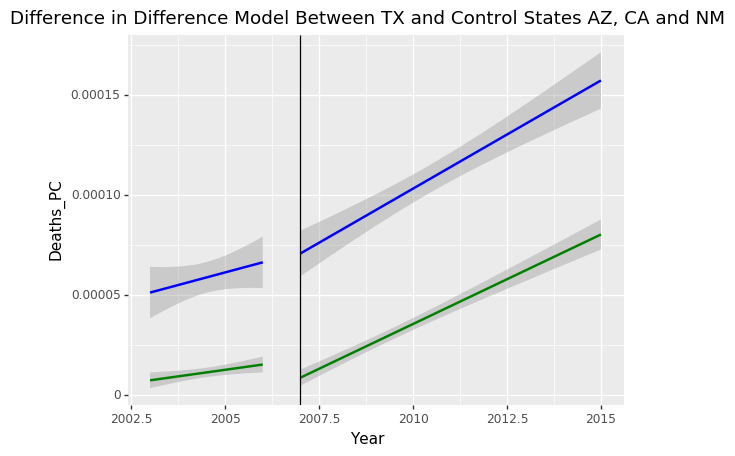

<ggplot: (-9223371892436177700)>

In [7]:
#Test if it works
diff_in_diff('TX', ['AZ','CA','NM'], 'Deaths_PC', 2007)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


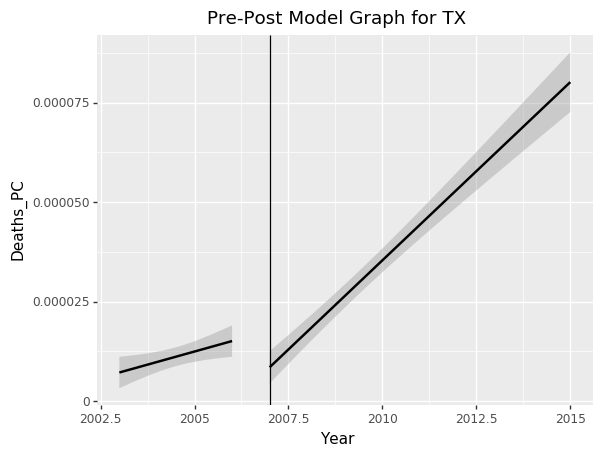

<ggplot: (-9223371892435259088)>

In [8]:
#Test if pre_post works
Pre_Post('TX', ['AZ','CA','NM'], 'Deaths_PC', 2007)